Alcance =  169.37419398368206


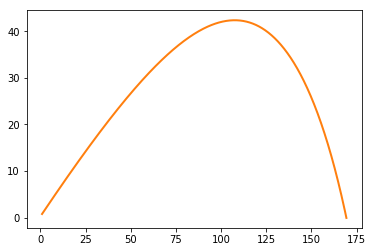

In [3]:
#==============================================================================
#                    Descrição:
#     Runge-Kutta de 4° Ordem em enfase a lançamento de projetio
#==============================================================================

import matplotlib.pyplot as plt
from math import *
import numpy as np

def fx(ca, vy, vx, m, mi):
    return -(1/m) * ca * (sqrt(vx**2 + vy**2) * vx) - mi * vx

def fy(ca, vy, vx, g, m, mi):
    return -g -(1/m) * ca * (sqrt(vx**2 + vy**2) * vy) - mi * vy

def gx(vx):
    return vx

def gy(vy):
    return vy

m = 0.010 
ca = 0.00010 
mi = 18.68e-6
g = 9.80 

h = 0.01 
t0 = 0 
x0 = 0 
y0 = 0.3 
V0 = 100.0 
tetha = 3.14159 * 30.0/ 180.0 
vx0 = V0 * cos(tetha) 
vy0 = V0 * sin(tetha) 

i   = 1;

t  = t0 ;
x  = x0 ;
y  = y0 ;
vx = vx0 ;
vy = vy0 ;

tempo = []
posicx = []
posicy = []
while(y > 0.0001):
    
    k11 = h * fx(ca, vy, vx, m, mi)
    k12 = h * fy(ca, vy, vx, g, m, mi)
    k13 = h * gx(vx)
    k14 = h * gy(vy)
    
    t = t + 0.5 * h
    
    k21 = h * fx(ca, vy + 0.5 * k12, vx + 0.5 * k11, m, mi)
    k22 = h * fy(ca, vy + 0.5 * k12, vx + 0.5 * k11, g, m, mi)
    k23 = h * gx(vx + 0.5 * k11)
    k24 = h * gy(vy + 0.5 * k12)
    
    
    k31 = h * fx(ca, vy + 0.5 * k22, vx + 0.5 * k21, m, mi)
    k32 = h * fy(ca, vy + 0.5 * k22, vx + 0.5 * k21, g, m, mi)
    k33 = h * gx(vx + 0.5 * k21)
    k34 = h * gy(vy + 0.5 * k22)
    
    t = t + 0.5 * h
    
    k41 = h * fx(ca, vy + k32, vx + k31, m, mi)
    k42 = h * fy(ca, vy + k32, vx + k31, g, m, mi)
    k43 = h * gx(vx + k31)
    k44 = h * gy(vy + k32)
    
    vx = vx + (1.0/6.0) * ( 1.0 * k11 + 2.0 * k21 + 2.0 * k31 + 1.0 * k41 ) 
    vy = vy + (1.0/6.0) * ( 1.0 * k12 + 2.0 * (k22 + k32) + 1.0 * k42 ) 
    x  =  x + (1.0/6.0) * ( 1.0 * k13 + 2.0 * (k23 + k33) + 1.0 * k43 ) 
    y  =  y + (1.0/6.0) * ( 1.0 * k14 + 2.0 * (k24 + k34) + 1.0 * k44 ) 
    
    tempo.append(t) ;
    posicx.append(x) ;
    posicy.append(y) ;


print("Alcance = ", posicx[-1])
plt.plot(posicx ,posicy,'C1', linewidth=2)
plt.show()